### Time Series Forecasting using LSTM and GRU
In this notebook will use LSTM & GRU for predicting the price of stocks of IBM for the year 2017

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

## Helper Functions for Plotting Predictions and Calculating RMSE

In [4]:
def plot_predictions(test, predicted):
    plt.plot(test, color='red', label='Real IBM Stock Price')
    plt.plot(predicted, color='blue', label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error is {}.".format(rmse))

In [ ]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

## Getting the data

In [7]:
# First, we get the data
dataset = pd.read_csv('D:\\Tuwaiq Academy\\Tuwaiq_Academy_T5_Week_5\\Week5LAB2\\Datasets\\IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


Slpitting dataset to train set (Before 2017) and test set (2017 and beyond)

In [8]:
train_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

In [ ]:
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

Visualizing the data

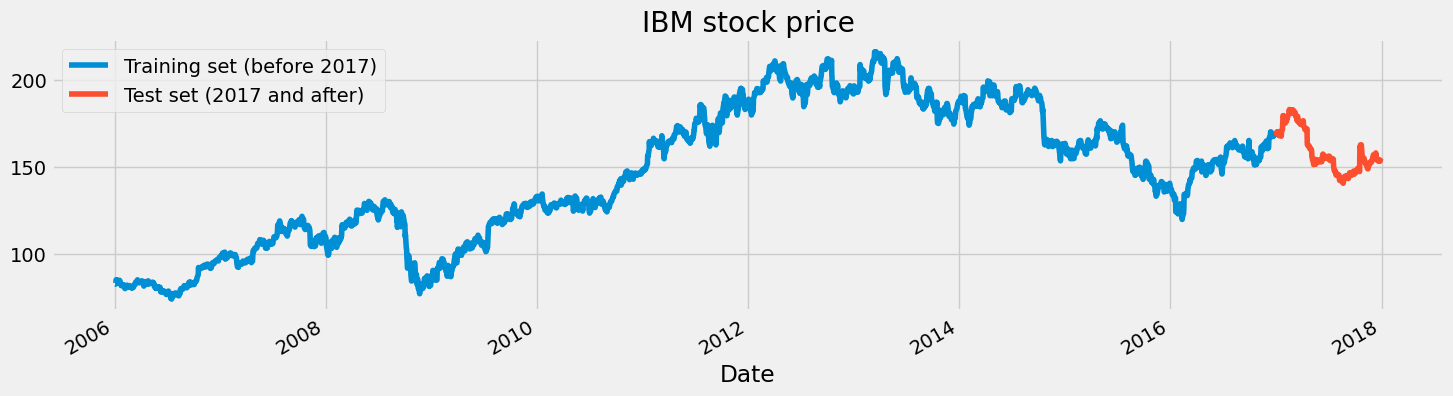

In [11]:
dataset['High'][:'2016'].plot(figsize=(16,4), legend=True)
dataset["High"]['2017':].plot(figsize=(16,4), legend=True)
plt.legend(['Training set (before 2017)', 'Test set (2017 and after)'])
plt.title('IBM stock price')
plt.show()

In [ ]:
# We have chosen 'High' attribute for prices.
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

## Data Preprocessing

Scaling the training set

In [13]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output. So for each element of training set, we have 60 previous training set elements

In [15]:
X_train = []
y_train = []
for i in range(60,2000):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

Reshaping X_train for efficient modelling

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

## LSTM Model

In [18]:
regressor = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

regressor.summary()

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - loss: 0.0348
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0075
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0082
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0062
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0067
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0062
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0056
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0061
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 0.0061
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0050
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0049
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0042
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0037
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0044
Epoch 15/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - l

In [ ]:
# The LSTM architecture
regressor = Sequential()

# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)


## Make preductuion with LSTM model

In [23]:
dataset_total = pd.concat((dataset["High"][:'2016'], dataset["High"]['2017':]), axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [24]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step


Visualizing the results

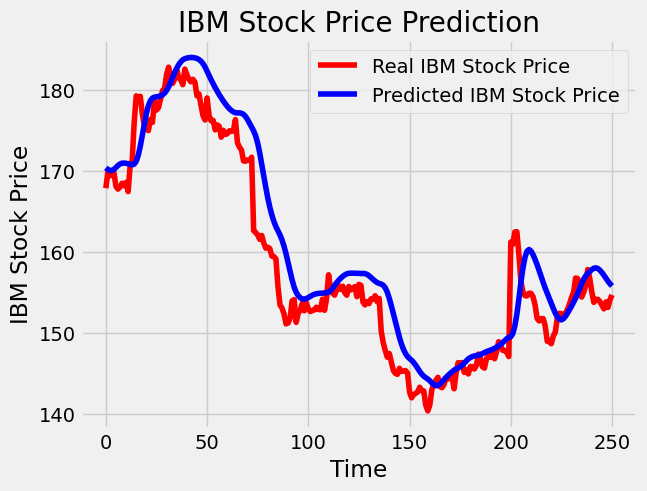

In [25]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

Evaluating LSMT Model

In [26]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

the root mean squared error is 4.040621859325908.


## GRU Model

In [28]:
RGRU = Sequential([
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'),
    Dropout(0.2),
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'),
    Dropout(0.2),
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'),
    Dropout(0.2),
    GRU(50, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])

RGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

RGRU.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_8 (GRU)                     │ (None, 60, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_9 (GRU)                     │ (None, 60, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_10 (GRU)                    │ (None, 60, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11 (GRU)                    │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,901 (210.55 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
RGRU.fit(X_train, y_train, epochs=50, batch_size=150)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 275ms/step - loss: 0.1827
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 271ms/step - loss: 0.0662
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 270ms/step - loss: 0.0203
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - loss: 0.0068
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step - loss: 0.0051
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 287ms/step - loss: 0.0042
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 276ms/step - loss: 0.0038
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 277ms/step - loss: 0.0036
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 272ms/step - loss: 0.0039
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 269ms/step - loss: 0.0034
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 264ms/step - loss: 0.0031
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 274ms/step - loss: 0.0032
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 272ms/step - loss: 0.0033
Epoch 14/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 265ms/step - loss: 0.0028
Epoch 15/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 276ms/step - l

In [ ]:
# The GRU architecture
regressorGRU = Sequential()

# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

# The output layer
regressorGRU.add(Dense(units=1))

# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=150)


## Make preductuion with GRU model

In [31]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
GRU_predicted_stock_price = RGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step


Visualizing the Results

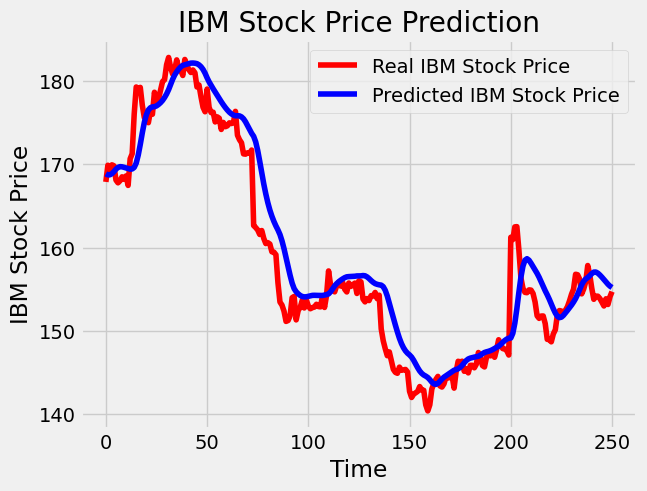

In [32]:
plot_predictions(test_set,GRU_predicted_stock_price)

Evaluating GRU Model

In [33]:

return_rmse(test_set,GRU_predicted_stock_price)

the root mean squared error is 3.474207708147792.
